In [113]:
# 주어진 list를 n개씩 자르는 함수로, csv 파일에서 정보들을 나눠서 가져오기 위한 함수입니다.
def list_chuck(arr, n):
    return [arr[i: i + n] for i in range(0, len(arr), n)]

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


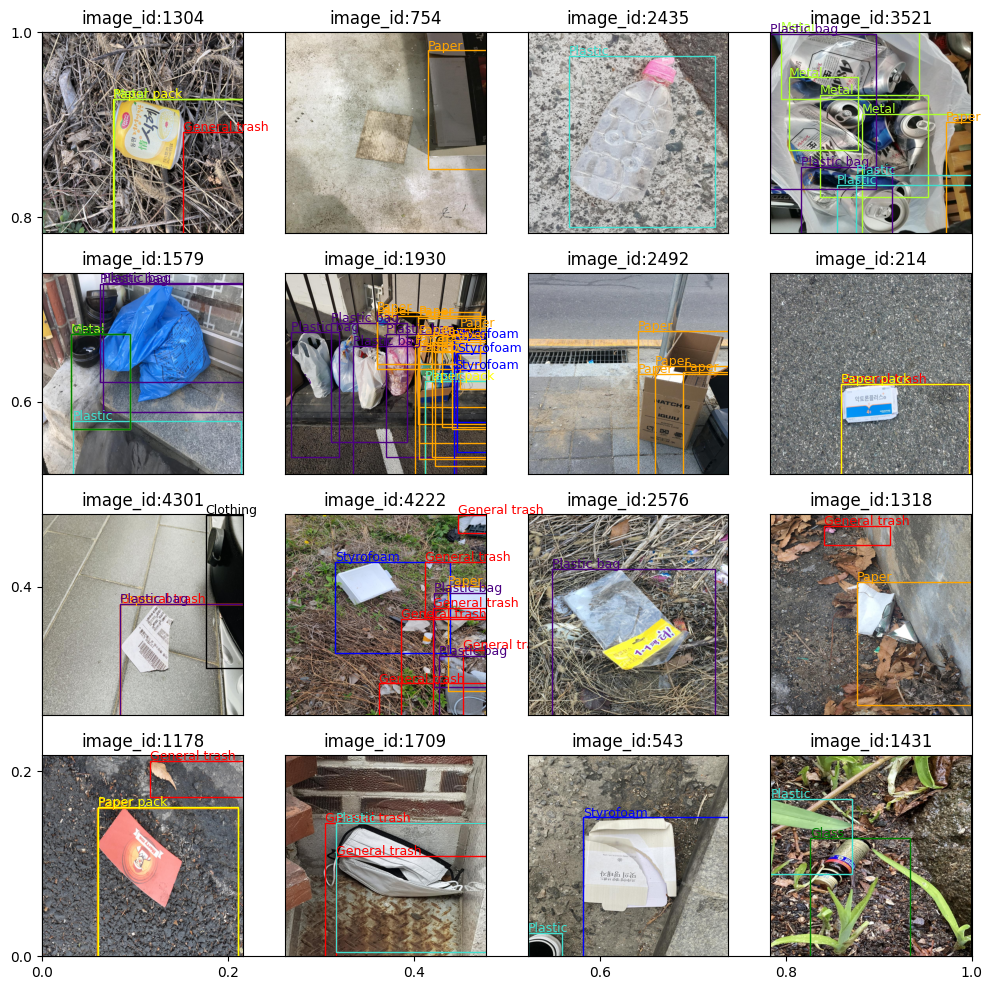

In [147]:
import os
import cv2
import numpy as np
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
import pandas as pd

data_dir = '/opt/ml/dataset'
annotation = os.path.join(data_dir, 'test.json')
coco = COCO(annotation)

# predict에 결과 박스를 확인하고 싶으신 submission.csv 파일을 넣어주세요
predict = pd.read_csv("yolo_submission.csv")

classes = ["General trash", "Paper", "Paper pack", "Metal", "Glass", "Plastic", "Styrofoam", "Plastic bag", "Battery", "Clothing"]
LABELCOLORS = ['red', 'orange', 'yellow', 'greenyellow', 'green', 'turquoise', 'blue', 'indigo', 'purple', 'black']

fig, ax = plt.subplots(figsize=(12, 12))

for i in range(1, 17):
    n = random.randrange(0, 4872)
    image_id = coco.getImgIds(imgIds=n)
    image_info = coco.loadImgs(image_id)[0]
    target = int(image_info['file_name'].split('/')[1].replace('.jpg', ''))
    
    # test/0000.jpg에 아무 결과도 없는 경우를 방지하기 위한 try/except문
    try:
        result_array = list_chuck(predict['PredictionString'][target].split(" "), 6)
    except:
        pass

    cat = []
    box = []
    for ele in result_array:
        cat.append(ele[0])
        box.append(ele[2:])    
    cat.pop() # 끝부분 '' 처리
    box.pop() # 끝부분 '' 처리
    
    image = cv2.imread(os.path.join(data_dir, image_info['file_name']))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
    image /= 255.0

    ax = fig.add_subplot(4, 4, i, aspect=1)
    ax.set_title('image_id:'+str(n))
    plt.xticks([])
    plt.yticks([])
    for (x, y, w, h), c in zip(box, cat):
        label_color = LABELCOLORS[int(c)]
        ax.add_patch(patches.Rectangle((float(x), float(y)), float(w), float(h), edgecolor=label_color ,linewidth=1 ,fill=False))
        if annotation:
            ax.text(float(x), float(y)-5, classes[int(c)], fontsize=9, color=label_color)
    plt.imshow(image)